### grp

# Course: _Supervised Learning with Scikit-Learn_:
1.  classification
2.  regression
3.  model tuning
4.  ml pipelines

#### Machine Learning:
-  giving computers the ability to learn to make decisions from data

#### Supervised Learning:
-  learning from labeled data:
    -  historical data with labels
    -  experiments to get labeled data
    -  crowd-sourcing labeled data
-  predictor varaiables (features) and a target variable
-  aim to predict the target variable given the predictor variables
-  features aka predictor variables aka independent variables
-  target variable aka dependent variable aka response variable

#### Unsupervised Learning:
-  uncovering hidden patterns from unlabeled data

#### Reinforcement Learning:
-  software agents interact with an environment
-  learn how to optimize behavior

#### SKLearn:
-  fit() => train model
-  predict() => predict results

## _1. Classification:_
-  target variable consists of categories
-  **accuracy** => fraction of correct predictions [**use on TEST set to generalize on unseen data**]
-  Train/Test Split:
    -  split data into **TRAIN** and **TEST** set
    -  fit/train on **TRAIN** set
    -  make predictions on **TEST** set
    -  compare predictions with the known labels
-  KNN:
    -  predict the label of a data point via ...
    -  looking at the K closest labeled data points ...
    -  and taking the majority vote

#### iris dataset

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

iris = datasets.load_iris()
print(type(iris))
print(iris.keys())
print(type(iris.data), type(iris.target))
print(iris.data.shape)
print("="*10)
print(iris.data[:5])
print("="*10)
print(iris.target[:5])
print(iris.feature_names)
print(iris.target_names
)
X = iris.data
y = iris.target
iris_ds = pd.DataFrame(X, columns=iris.feature_names)

iris_ds.head()

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### eda

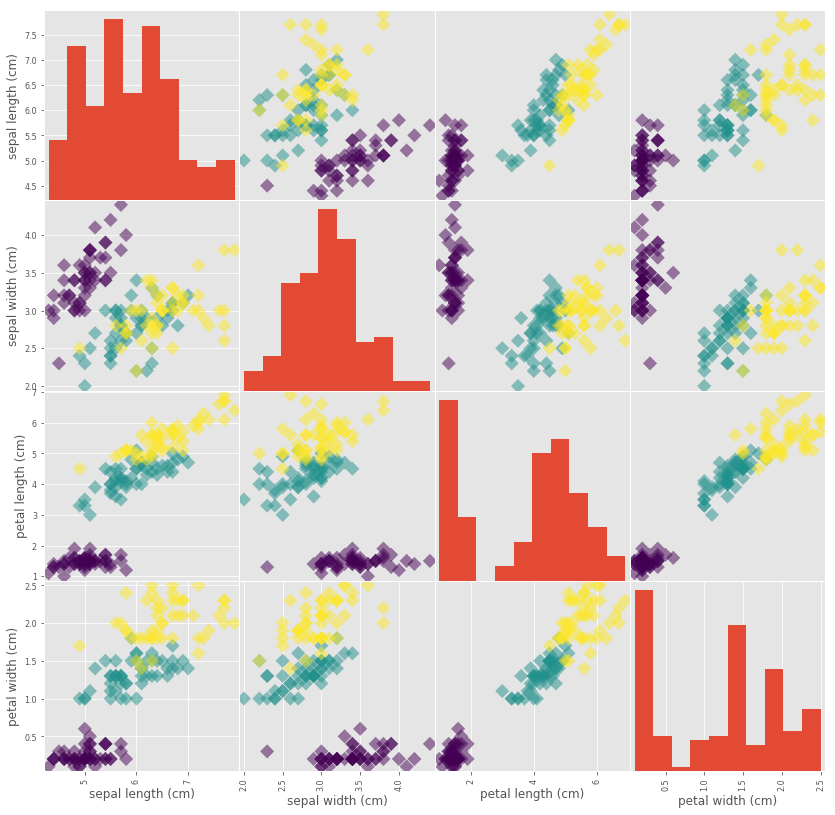

In [2]:
_ = pd.plotting.scatter_matrix(
    iris_ds,
    c = y,
    figsize = [14,14],
    s = 100,
    marker = 'D')
plt.show()

#### data prep

In [3]:
path = '/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/18 - \
supervisedlearningwithscikitlearn/house-votes-84.csv'

cols = ['party',
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']

horep = pd.read_csv(path, header=None, sep=",")
horep.columns = cols
horep = horep.replace({'y': 1, 'n': 0, '?': 0})
horep.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [4]:
horep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


#### knn fit

In [6]:
from sklearn.neighbors import KNeighborsClassifier

X = horep.drop('party', axis=1).values # features target
y = horep['party'].values # target array
knn = KNeighborsClassifier(n_neighbors=6) # 6 neighbors
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

#### knn predict [***demo purposes ... train/test split will be used later on***]

In [7]:
X_new = np.array([[ 0.84544632,  0.09121386,  0.45844538,  0.77837072,  0.99531963,
         0.32220424,  0.86846789,  0.21608219,  0.59137742,  0.00388029,
         0.70455842,  0.9320838 ,  0.57875631,  0.43022834,  0.40107905,
         0.9507966 ]]) # new data point

In [8]:
#y_pred = knn.predict(X)
new_prediction = knn.predict(X_new) # predictions on new data point
print("Prediction: {}".format(new_prediction))

Prediction: ['republican']


#### mnist dataset

In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

(1797, 8, 8)
(1797, 64)


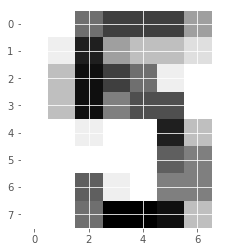

In [10]:
print(digits.images.shape)
print(digits.data.shape)

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

#### train/test split + fit/predict/accuracy:
-  stratify parameter makes a split so the proportion of values in the sample will be the same as the proportion of values provided to parameter stratify.
-  ex => if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones ... stratify=y will make sure random split has 25% of 0's and 75% of 1's.

In [11]:
from sklearn.model_selection import train_test_split

X = digits.data # features array
y = digits.target # target array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train) # fit on TRAIN set

print(knn.score(X_test, y_test)) # accuracy on TEST set; approx. 98% accuracy

0.9833333333333333


#### knn overfit/underfit

[1 2 3 4 5 6 7 8]
[0.14023372 0.14190317 0.33889816 0.34056761 0.53923205 0.5409015
 0.73956594 0.93989983]
[0.14023372 0.14190317 0.33889816 0.34056761 0.53923205 0.5409015
 0.73956594 0.93989983]


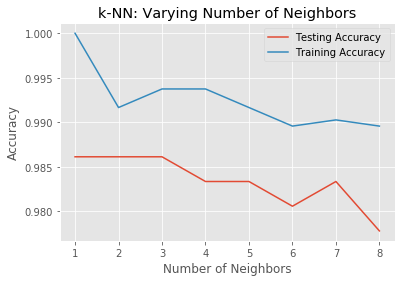

In [12]:
neighbors = np.arange(1, 9)
print(neighbors)
print("="*10)
train_accuracy = np.empty(len(neighbors))
print(train_accuracy)
print("="*10)

test_accuracy = np.empty(len(neighbors))
print(test_accuracy)
print("="*10)

for i, k in enumerate(neighbors): # loop over different values of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train) # TRAIN set accuracy
    test_accuracy[i] = knn.score(X_test, y_test) # TEST set accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() # idea is to find a sweet spot where accuracy is highest on new data [K = 3 in this example]

## _2. Regression:_
-  target variable is continuous
-  y - ax + b:
    -  y = target
    -  x = single feature
    -  a,b = parameters of model
-  **_How do we choose a and b?_**
    -  define an error function (**loss function; cost function**) and minimize the error function
    -  minimize the distance between the model fit and the data points
    -  goal is to get the fitted line as close to the **actual** data points as possible
    -  for each data point calculate the vertical distance between the data point and the fitted line => **residuals**
    -  minimize the sum of the squares of the residuals => **loss function**:
        -  performs OLS [ordinary least squares] under the hood

#### load dataset

In [13]:
path = '/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/18 - \
supervisedlearningwithscikitlearn/gm_2008_region.csv'

gapminder = pd.read_csv(path)
X = gapminder.drop(['life', 'Region'], axis=1).values
y = gapminder["life"].values
print(X.shape)
print(y.shape)
gapminder.head()

(139, 8)
(139,)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


#### reshape data

In [14]:
print(gapminder.shape)
print("="*10)

X_old = gapminder['fertility'].values
y_old = gapminder['life'].values
print(X_old[:5])
print("="*10)
print(y_old[:5])

print("Dimensions of X before reshaping: {}".format(X_old.shape))
print("Dimensions of y before reshaping: {}".format(y_old.shape))
print("="*10)

# reshape X and y
X_new = X_old.reshape(-1, 1)
y_new = y_old.reshape(-1, 1)

print("Dimensions of X after reshaping: {}".format(X_new.shape))
print("Dimensions of y after reshaping: {}".format(y_new.shape))
print("="*10)

print(X_new[:5])
print("="*10)
print(y_new[:5])

(139, 10)
[2.73 6.43 2.24 1.4  1.96]
[75.3 58.3 75.5 72.5 81.5]
Dimensions of X before reshaping: (139,)
Dimensions of y before reshaping: (139,)
Dimensions of X after reshaping: (139, 1)
Dimensions of y after reshaping: (139, 1)
[[2.73]
 [6.43]
 [2.24]
 [1.4 ]
 [1.96]]
[[75.3]
 [58.3]
 [75.5]
 [72.5]
 [81.5]]


#### correlation

In [15]:
gapminder.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


#### fit/predict linear regression [***demo purposes ... train/test split will be used later on***]

0.6192442167740035


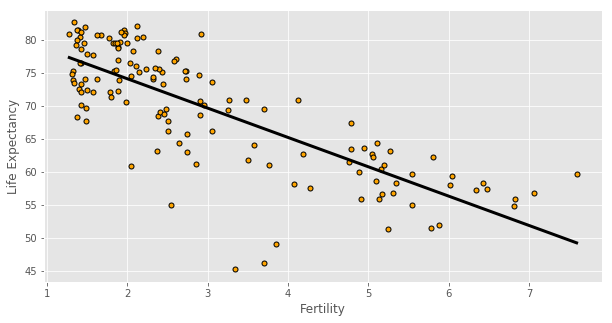

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

X_fertility = gapminder.fertility.values.reshape(-1, 1)
y = gapminder.life.values

reg = linear_model.LinearRegression()
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
reg.fit(X_fertility, y)
y_pred = reg.predict(prediction_space)
print(reg.score(X_fertility, y)) # R^2

plt.figure(figsize=(10,5))
plt.plot(X_fertility, y,
    marker='o',     
    markersize = 5,
    color = 'orange',
    markeredgewidth = 1,
    markeredgecolor = 'k',
    linestyle='none')
plt.plot(prediction_space, y_pred, color = 'black',linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

#### linear regression train/test split

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = gapminder.drop(['life', 'Region'], axis=1).values
y = gapminder["life"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = linear_model.LinearRegression()

reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731429986
Root Mean Squared Error: 3.2476010800370934


# _K-Fold Cross Validation_:
-  model fit runs through different subsets of training set and tests on validation set

In [19]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793401


In [23]:
import time

reg = LinearRegression()

%timeit cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))
%timeit cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

2.69 ms ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8718712782622201
8.56 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8436128620131246


# _Regularization_:
-  note that linear regression minimizes a loss function thus it chooses a coefficient for each feature variable
-  large coefficients can lead to overfitting the model
-  regularization penalizes large coefficients
-  Ridge Regression => alpha controls model complexity
-  Lasso Regression:
    -  helps select important features of a dataset (**feature selection**)
    -  reduces coefficients for irrelevant features

#### lasso

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


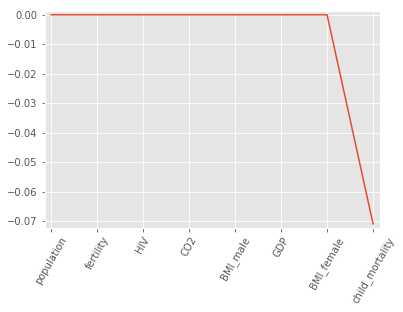

In [24]:
cols = ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.4, normalize=True)

lasso.fit(X, y)

lasso_coef = lasso.coef_ # feature coefs
print(lasso_coef) 
# child_mortality seems to be the most important feature in predicting life exp.
# irrelevant features are closer to 0

plt.plot(range(len(cols)), lasso_coef)
plt.xticks(range(len(cols)), cols, rotation=60)
plt.margins(0.02)
plt.show()

#### ridge

In [25]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

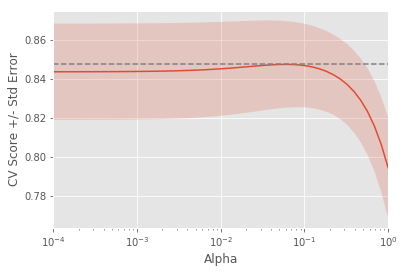

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)

## _3. Fine-Tuning Model_:
-  class imbalance => when majority of values make up one class
-  confusion matrix => classification metric to evaluate model performance
-  roc curve => classification metric to _visually_ evaluate model performance
-  auc curve => larger the area under the roc curve **the better the model**
-  Hyperparameter tuning:
    -  combo w/ CV and parameter values to find optimal param values however requires more computing 
    -  GridSearchCV inputs => **{model_pipeline, param_grid, cv=n}**

#### confustion matrix

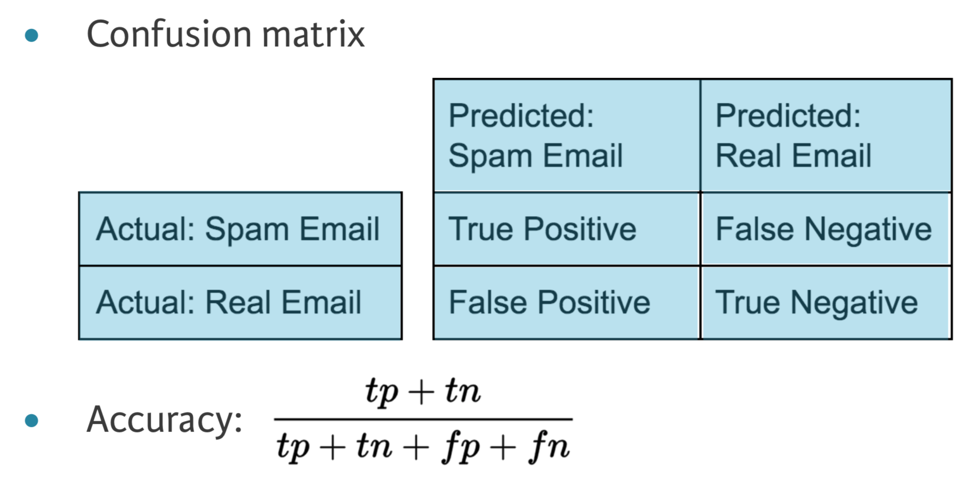

In [27]:
from IPython.display import Image
Image(filename='img/confusion_matrix.png', width=375, height=375)

# correctly labeled spam emails => TP
# correctly labeled real emails => TN

# incorrectly labeled spam emails => FN
# incorrectly labeled real emails => FP

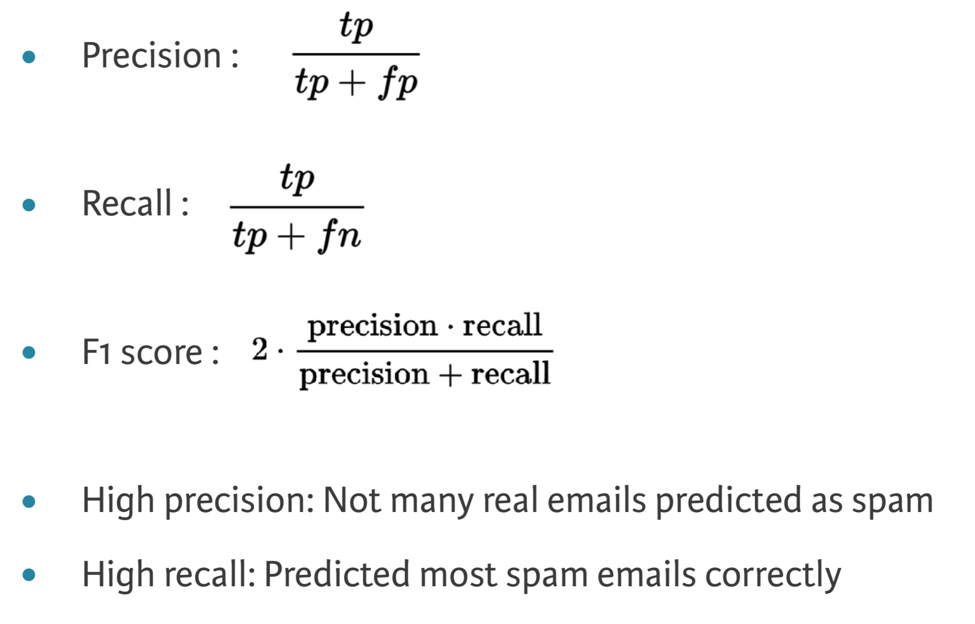

In [28]:
from IPython.display import Image
Image(filename='img/confusion_matrix_metrics.png', width=375, height=375)

# precision => AKA positive predicted value
# recall => AKA sensitivity or true positive rate
# f1 => AKA mean of precision and recall

#### classification metrics

In [29]:
path = '/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/18 - \
supervisedlearningwithscikitlearn/diabetes.csv'

diabetes = pd.read_csv(path)
X = diabetes.drop(['diabetes'], axis = 1).values
y = diabetes.diabetes.values
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



#### logistic regression model

In [31]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

logreg = LogisticRegression(solver='liblinear') # removed a warning
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



#### logistic regression roc curve

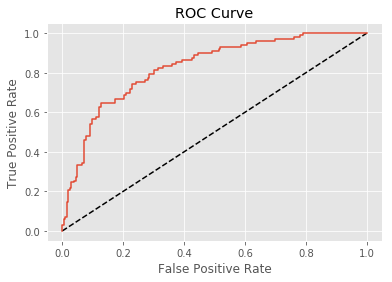

In [32]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1] # predicted probas [index pos 1]

# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### logistic regression auc curve

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = logreg.predict_proba(X_test)[:,1] # predicted probas [index pos 1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc') # get CV auc scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8268608414239482
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


#### hyper tuning w/ grid

In [34]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression(solver='liblinear')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) # best param values
print("Best score is {}".format(logreg_cv.best_score_)) # best eval score

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


#### hyper tuning w/ random grid

In [35]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.7395833333333334


#### hold-out set

In [36]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg = LogisticRegression(solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 25% of data will be hold-out set while remaining 75% go 
# through 5 k-fold CVs with 4/5th training and 1/5th validation

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7743055555555556


#### elastic net regression:
-  in elastic net regularization the penalty term is a linear combination of the L1 and L2 penalties

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10)
gm_cv.fit(X_train, y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.13793103448275862}
Tuned ElasticNet R squared: 0.23585853914047036
Tuned ElasticNet MSE: 0.16925430485305737


## _4. Preprocessing and Pipelines_:
-  convert categorical variables to "dummy variables" via sklearn OneHotEncoder() or pandas get_dummies()
-  impute and handle missing values
-  normalize data so features are on a similar scale:
    -  standardization (**subtract the mean and divide by variance**)
    -  subtract the minimum and divide by range (**minimum zero and maximum one**)

#### explore categorical vars

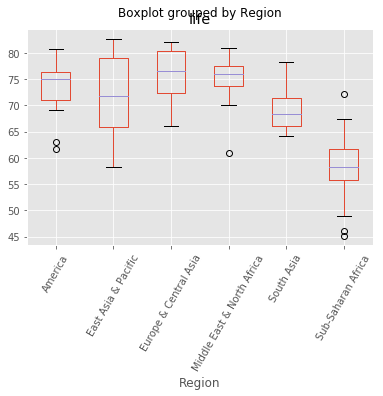

In [38]:
gapminder.boxplot('life', 'Region', rot=60)

plt.show()

#### create dummies via pandas

In [39]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [40]:
gm_region = pd.get_dummies(gapminder)
print(gm_region.columns)

gm_region = gm_region.drop('Region_America', axis=1) # drop categorical var
print(gm_region.columns)
gm_region.head()

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


#### run a model w/ dummy vars

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

X = gm_region.drop(['life'], axis=1).values
y = gm_region.life.values

ridge = Ridge(alpha=0.5, normalize=True)
ridge_cv = cross_val_score(ridge, X, y, cv=5)

print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


#### drop missing values

In [42]:
path = '/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/18 - \
supervisedlearningwithscikitlearn/house-votes-84.csv'

cols = ['party',
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']

horep_nulls = pd.read_csv(path, header=None, sep=",")
horep_nulls.columns = cols
horep_nulls = horep_nulls.replace({'y': 1, 'n': 0})

horep_nulls[horep_nulls == '?'] = np.nan # convert ? to NaN
print(horep_nulls.isnull().sum()) # num of rows with NaN
print("="*10)

print("Shape of Original DataFrame: {}".format(horep_nulls.shape))
horep_drop_nulls = horep_nulls.dropna()
print("="*10)

print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(horep_drop_nulls.shape))
horep_drop_nulls.head()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


#### impute missing value ML transformer/estimator

In [43]:
# can keep X and y as dataframes
X = horep_nulls.drop('party', axis=1) # features target
y = horep_nulls['party'] # target array
X.head()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [44]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

clf = SVC()

steps = [('imputation', imp),\
         ('SVM', clf)]

imp.fit(X)
X_impute_nulls = imp.transform(X)
X_impute_nulls[:5]

array([[0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.],
       [0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.]])

#### ml pipeline

In [45]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]
        
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.99      0.96      0.98        85
  republican       0.94      0.98      0.96        46

   micro avg       0.97      0.97      0.97       131
   macro avg       0.96      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



#### scale features

In [46]:
path = '/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/18 - \
supervisedlearningwithscikitlearn/white-wine.csv'

white_wine = pd.read_csv(path)
X = white_wine.drop('quality', axis = 1).values
y = white_wine.quality.values > 5 # boolean target
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

# mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))
print("="*10)
# mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


#### scaling in ml pipeline

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test))) # improves model
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


#### classification ml pipeline

In [49]:
X = white_wine.drop('quality', axis = 1).values
y = white_wine.quality.values > 5 # boolean target

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7795918367346939
              precision    recall  f1-score   support

       False       0.67      0.63      0.65       318
        True       0.83      0.85      0.84       662

   micro avg       0.78      0.78      0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


#### regression ml pipeline

In [50]:
X = gapminder.drop(['life', 'Region'], axis=1)
y = gapminder["life"]

steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scalar', StandardScaler()),
         ('elasticnet', ElasticNet())]

pipeline = Pipeline(steps)

parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
gm_cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
gm_cv.fit(X_train, y_train)
r2 = gm_cv.score(X_test, y_test)

print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888216


### grp